# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset comes from 17 direct marketing campaigns conducted between May 2008 and November 2010, involving a total of 79,354 contacts. In these phone-based campaigns, the bank promoted a long-term deposit product with attractive interest rates. For each contact, a wide range of attributes was recorded, along with whether the client subscribed to the deposit (the target outcome). Across all campaigns, 6,499 clients subscribed, giving an overall success rate of about 8%.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import RocCurveDisplay


from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
12784,34,admin.,married,university.degree,no,no,yes,cellular,jul,tue,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
39806,34,admin.,married,high.school,no,yes,no,cellular,jun,wed,...,1,6,2,success,-1.7,94.055,-39.8,0.704,4991.6,yes
25748,40,technician,single,university.degree,no,no,no,cellular,nov,wed,...,3,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
13262,31,blue-collar,married,basic.9y,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
10780,28,management,married,high.school,unknown,no,no,telephone,jun,tue,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
32663,45,technician,unknown,basic.6y,no,no,no,cellular,may,mon,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
22491,46,blue-collar,married,basic.6y,no,yes,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
18750,31,services,single,high.school,no,no,yes,cellular,jul,thu,...,17,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
29685,50,technician,married,professional.course,no,yes,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
15227,29,unemployed,married,university.degree,no,no,no,cellular,jul,thu,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
#missing = df.isnull().sum()[df.isnull().any()]
#Several categorical features contain “unknown” values that represent missing information. These will be treated as valid categorical labels

# Print data stats 
print("Data stats:")
desc = df.describe(include='all')
# Transpose for redability
desc_transposed = desc.transpose().reset_index()
desc_transposed.rename(columns={'index': 'Column'}, inplace=True)
desc_transposed

Data stats:


,Column,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
1,job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# check the categorical features
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_features:
    print(f"{col}: {df[col].dropna().unique()}")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [6]:
#columns that contain the string "unknown"
cols_with_unknown = [col for col in df.columns 
                     if df[col].astype(str).str.contains('unknown').any()]

# Count occurrences of "unknown" in each column
unknown_counts = {col: (df[col] == 'unknown').sum() for col in cols_with_unknown}

pd.DataFrame.from_dict(unknown_counts, orient='index', columns=['unknown_count'])


,unknown_count
job,330
marital,80
education,1731
default,8597
housing,990
loan,990


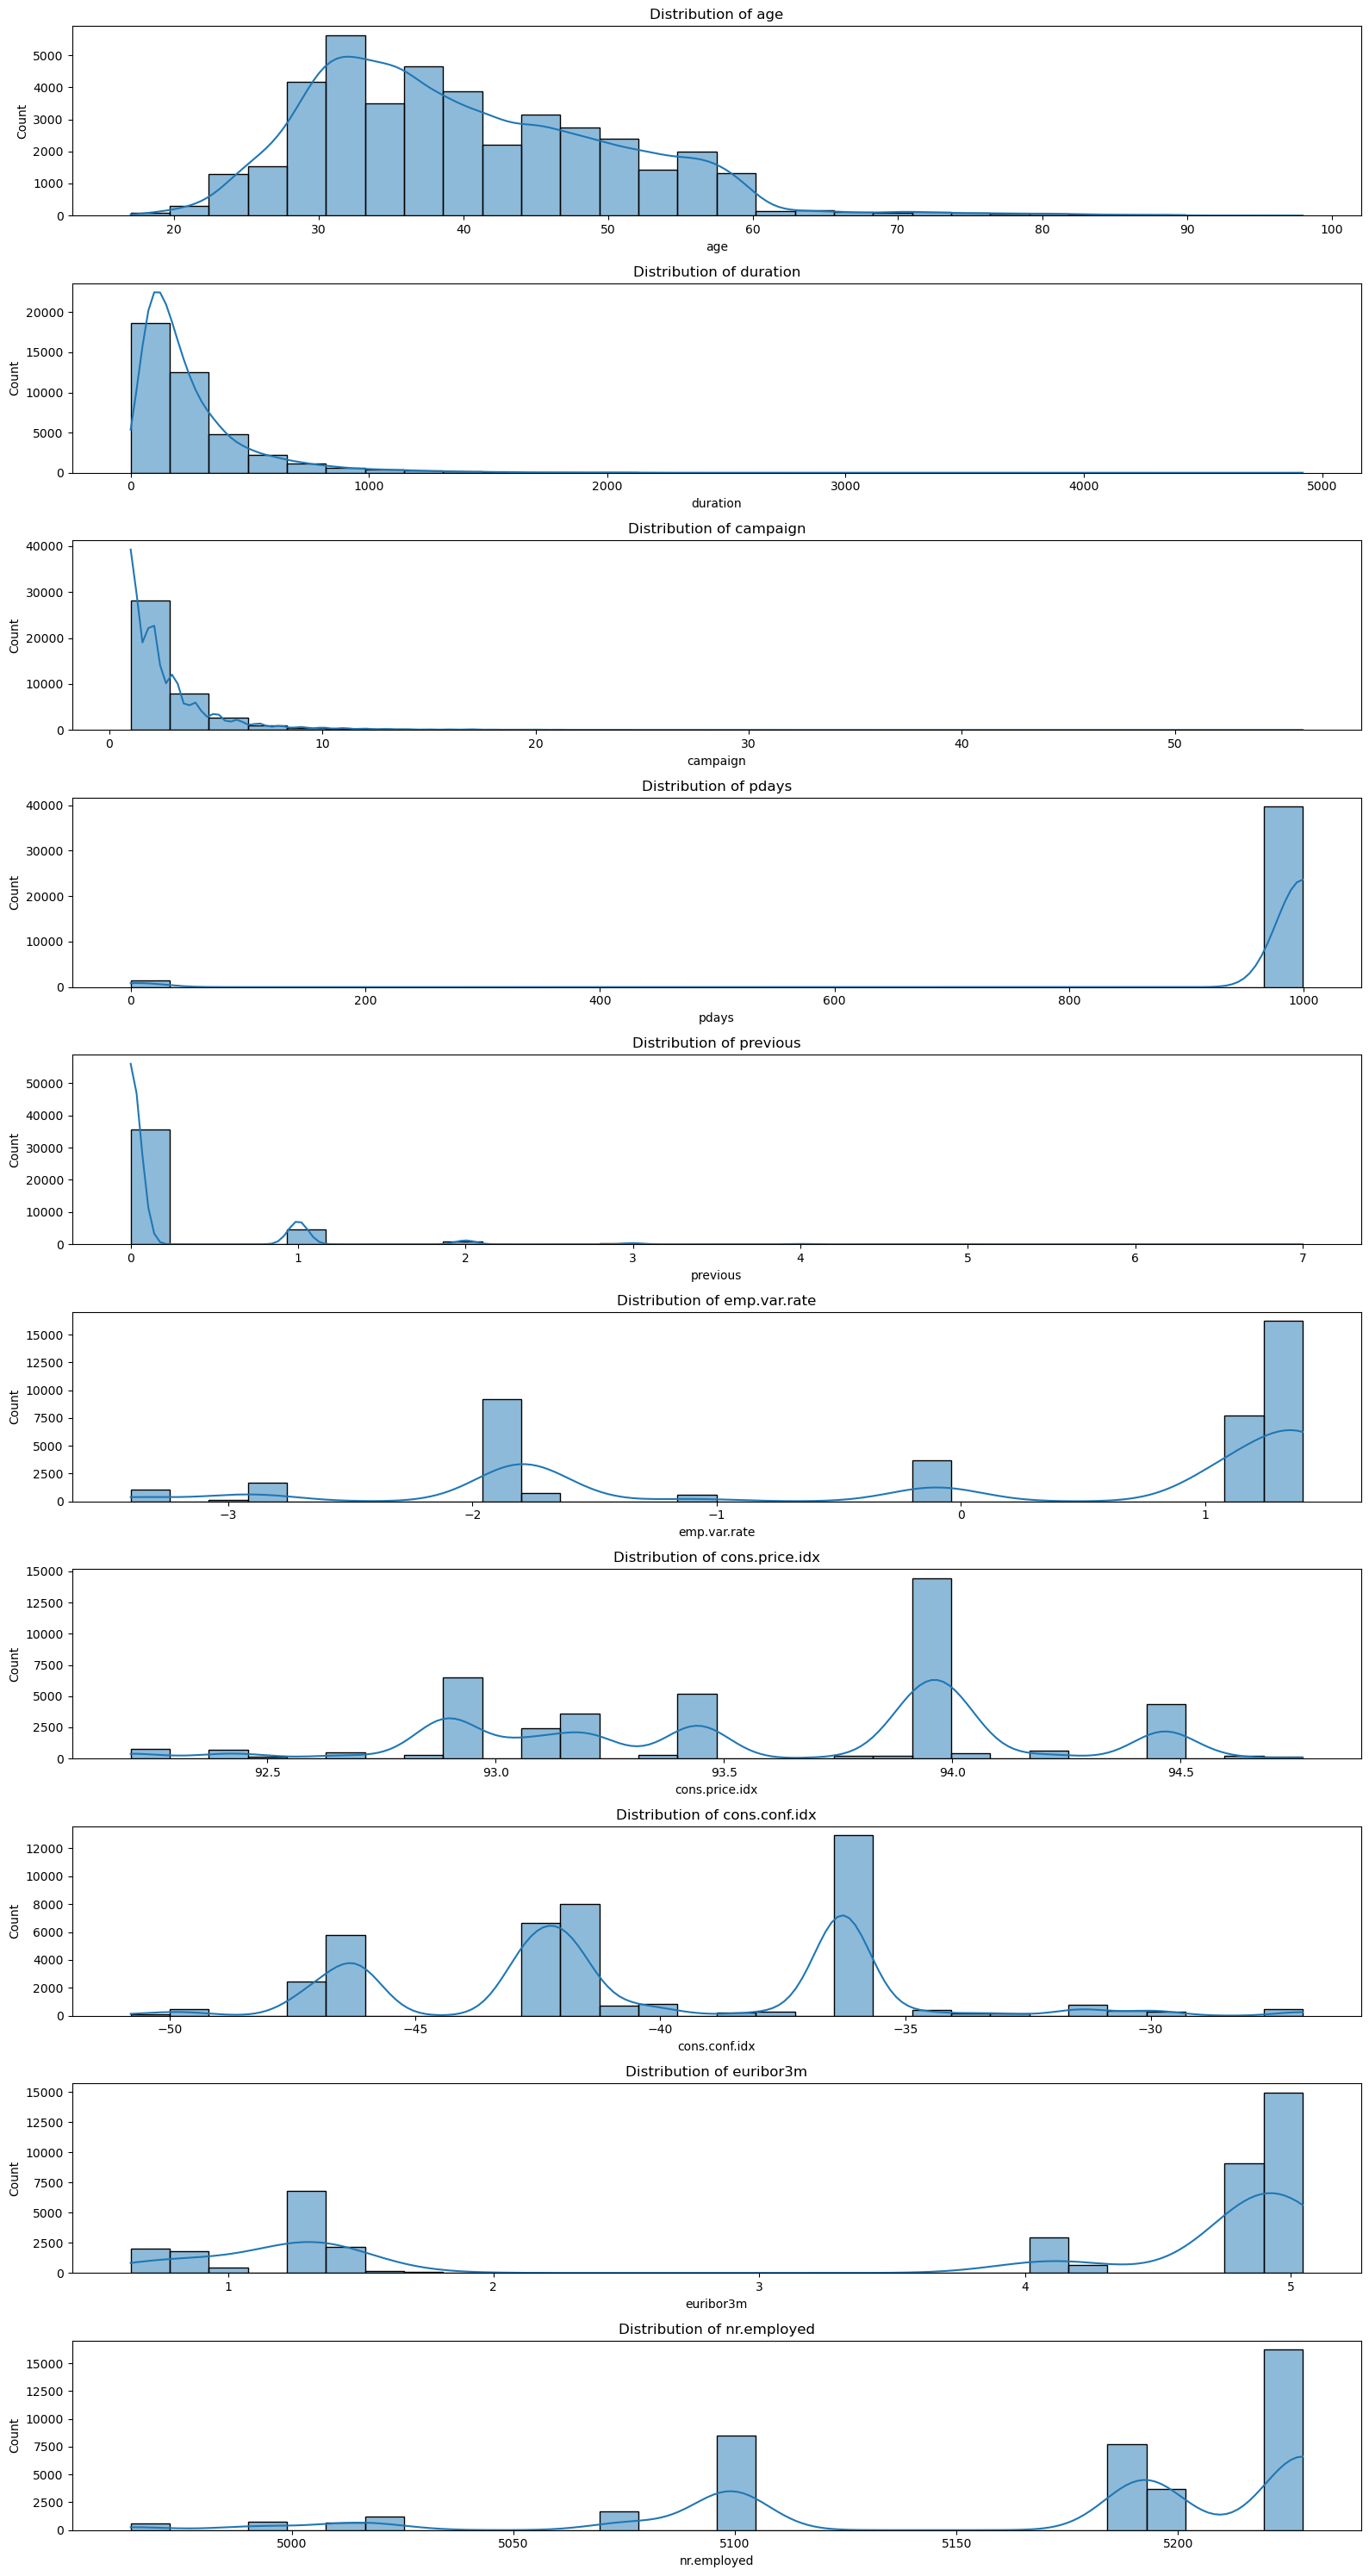

In [7]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(16, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


*Observations:*

- The economic indicators (euribor3m, cons.price.idx, cons.conf.idx, nr.employed) all show distinct peaks
- pdays is moslty 999, providing little usable information.
- previous is mostly zero, indicating low historical campaign exposure.
- The dataset is imbalanced and has low signal for classification. 
- Campaign-related features such as duration, contact frequency and past outcomes may need to be include.

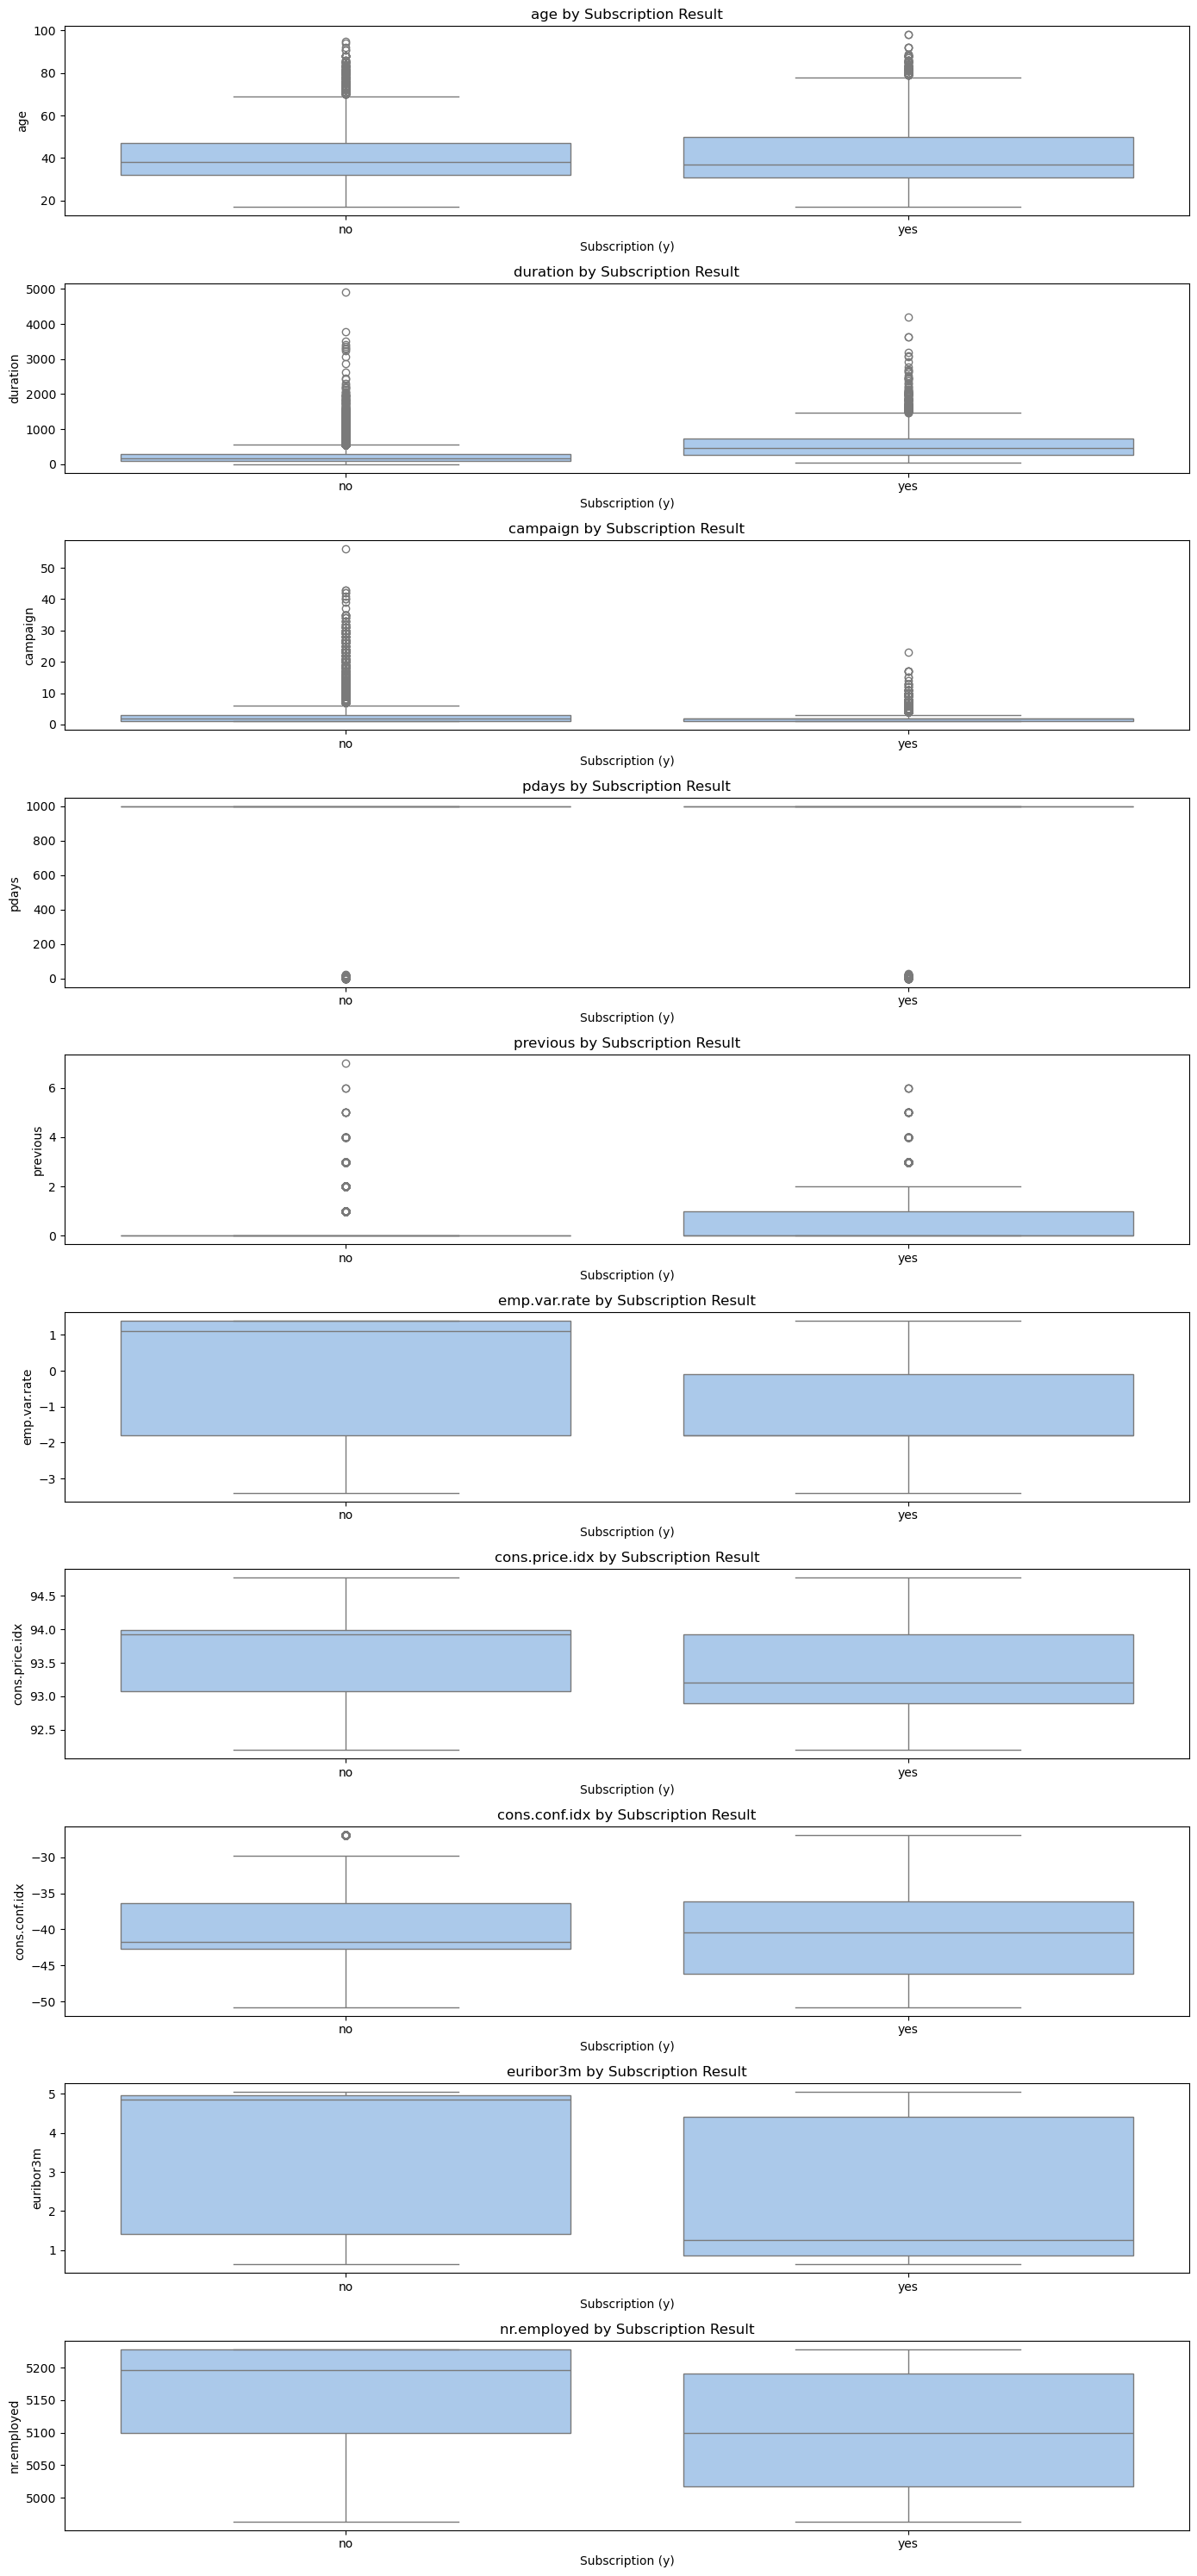

In [8]:
plt.figure(figsize=(14, len(numeric_cols) * 3))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot( data=df, x='y', y=col,  color=sns.color_palette("pastel")[0])
    plt.title(f"{col} by Subscription Result", fontsize=12)
    plt.xlabel("Subscription (y)")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


*Observations:*

Most numeric features show significant overlap between customers who subscribed and those who didn’t, so again indication are that client attributes alone do not differentiate outcomes.

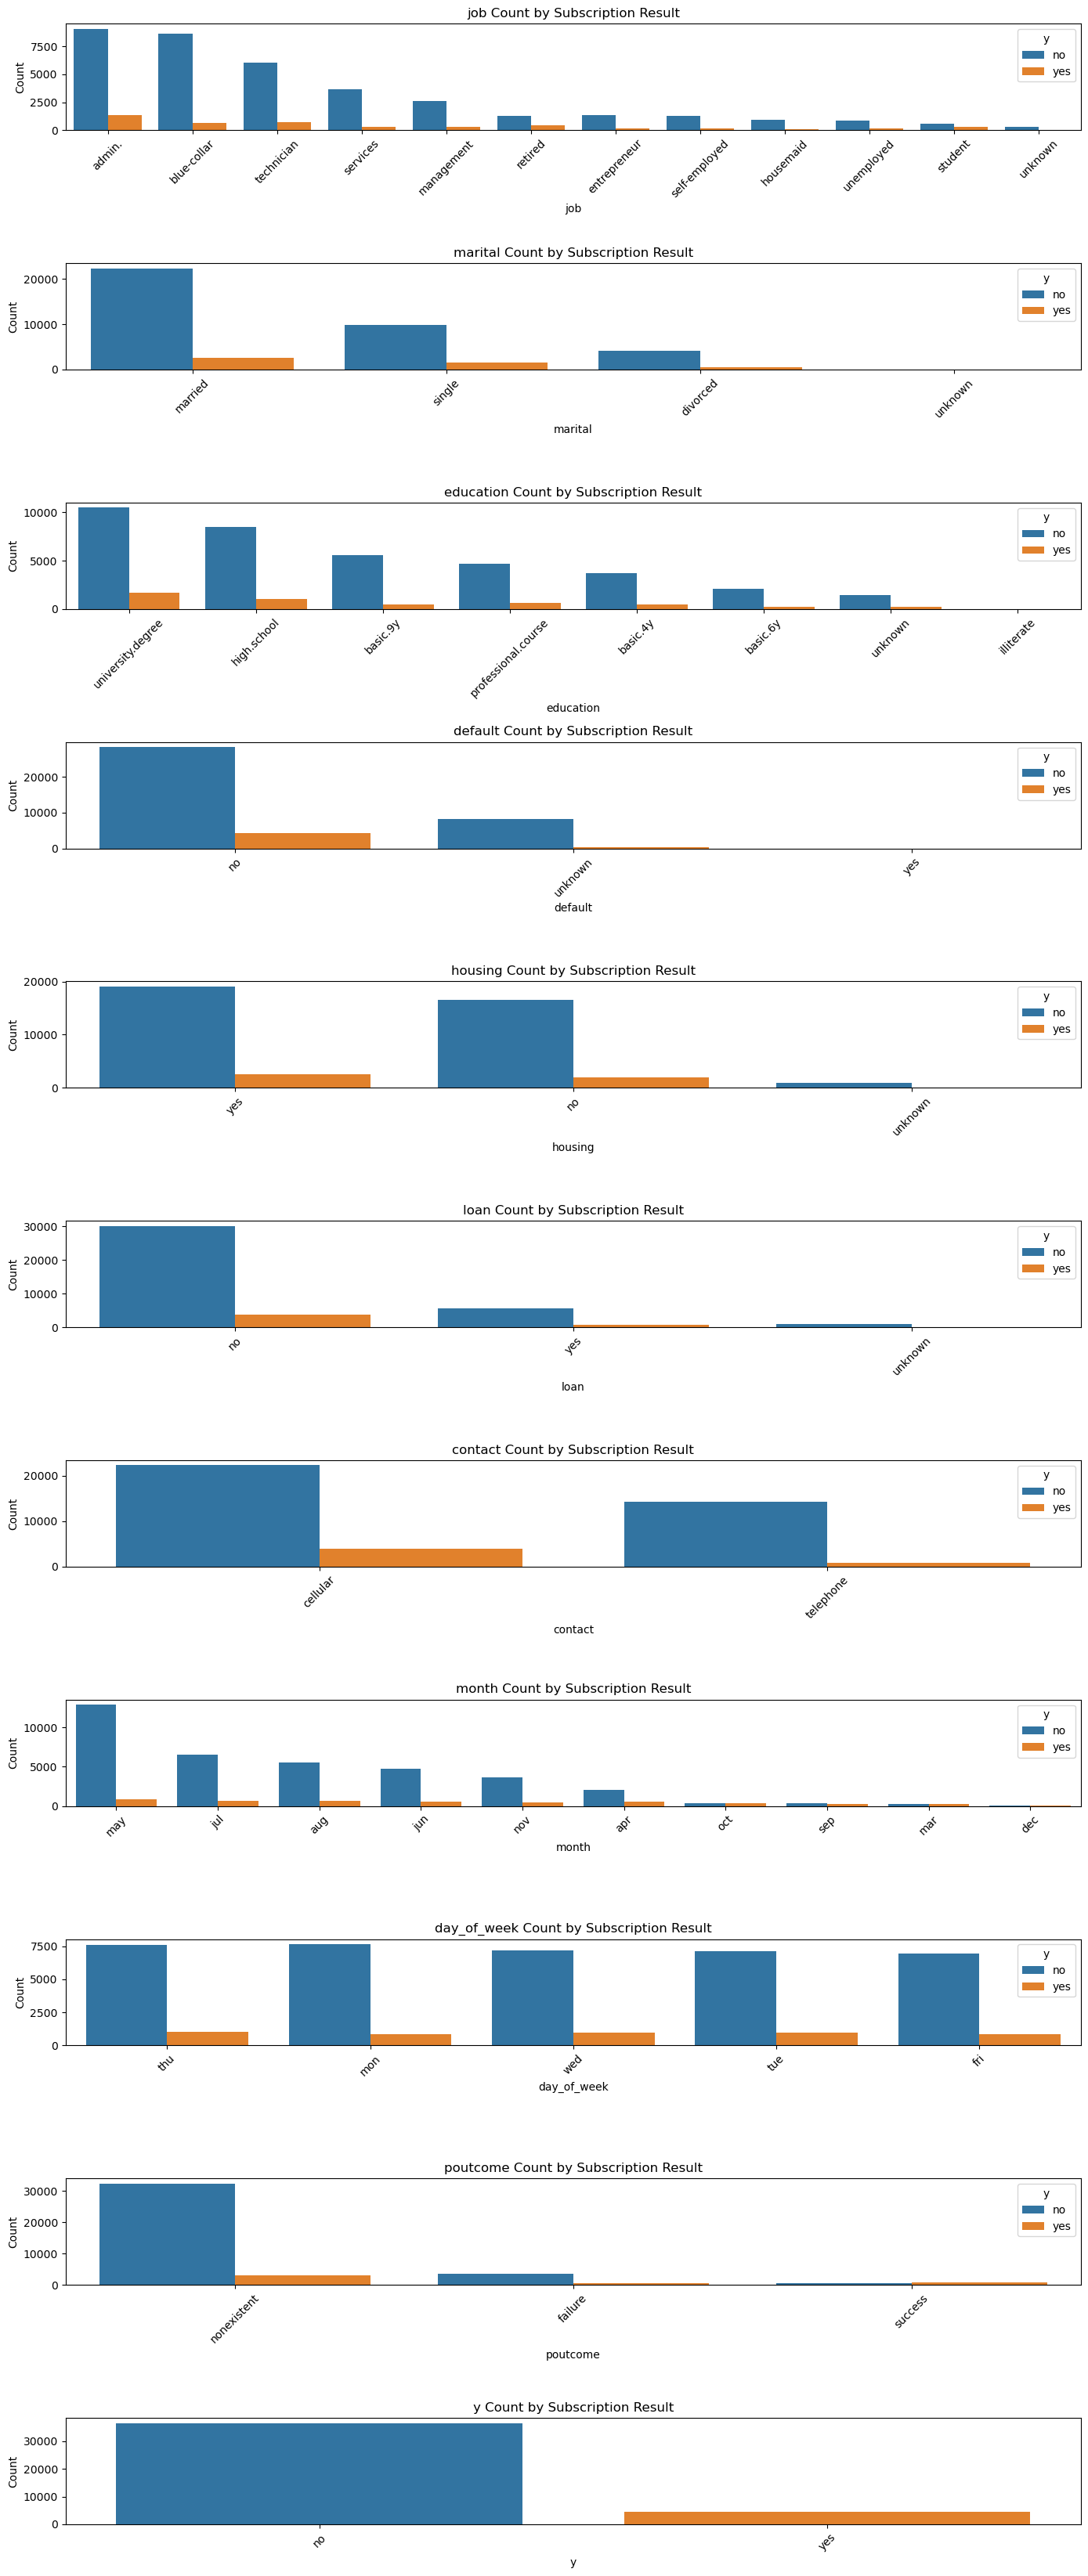

In [9]:
plt.figure(figsize=(14, len(categorical_features) * 3))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    
    # Sort by frequency 
    order = df[col].value_counts().index
    sns.countplot(data=df, x=col, hue='y', order=order)

    plt.title(f"{col} Count by Subscription Result", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [10]:
# Target encoding
df['y_binary'] = df['y'].map({'no': 0, 'yes': 1})

df_corr = df.copy()
#df_corr['y_binary'] = df_corr['y'].map({'no': 0, 'yes': 1}).astype(int)

numeric_cols_only = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols_only = [col for col in numeric_cols_only if col != 'y_binary']

#remove duration 
numeric_cols_only = [col for col in numeric_cols_only if col != 'duration']

# Compute correlation
corr_matrix = df[numeric_cols_only].corr()
target_corr = df[numeric_cols_only].corrwith(df['y_binary']).sort_values(ascending=False)

print(target_corr)


previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
dtype: float64


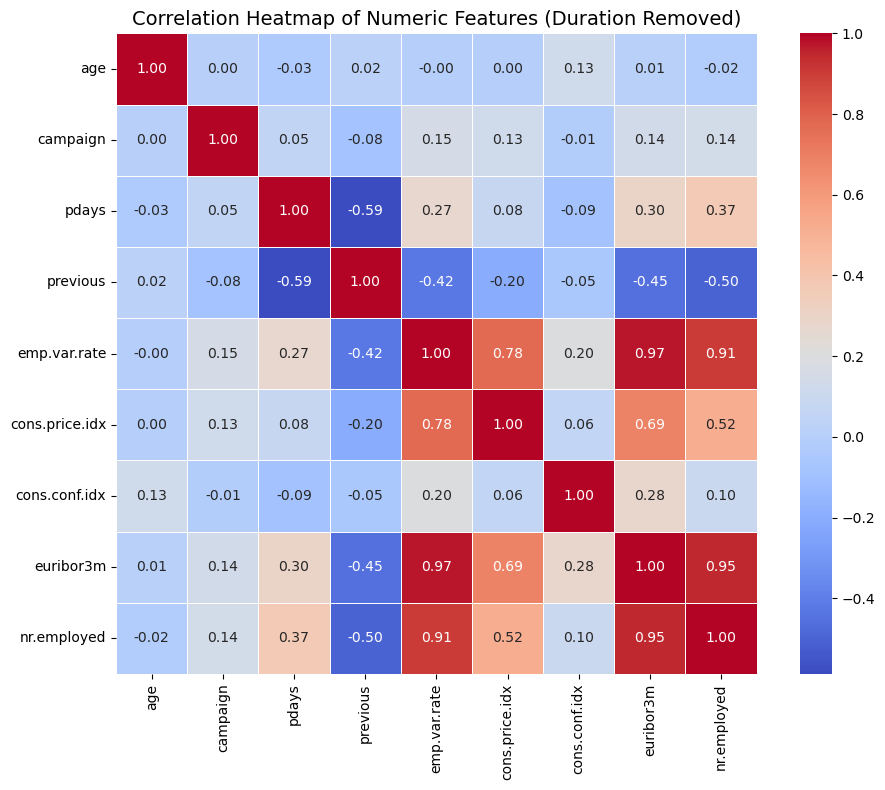

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap of Numeric Features (Duration Removed)", fontsize=14)
plt.tight_layout()
plt.show()


*Observations:*
Correlations is low for numeric client features, indicating minimal linear relationships. The highest correlations are among the economic indicators (euribor3m and nr.employed).

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*Business Objective*

The objective of this task is to compare and identify a model that explains which prospective clients are likely to respond positively to a direct marketing campaign and subscribe to a term deposit. Using historical client, contact, and economic data, the goal is to predict which customers are more likely to subsribe. This helps the bank focus on high-potential clients, lower campaign costs, and make future marketing campaigns more targeted and data-driven.

In real-world settings, such models allow organisations to target the right prospects at the right time, allocate staff and budget more efficiently, and understand the key drivers of customer behaviour. This supports more personalised communication and improve conversion rates while reducing overall campaign effort.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [13]:
#df['y_binary'] = df['y'].map({'no': 0, 'yes': 1})
# Bank client info features only
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

X = df[bank_features]
y = df['y_binary']

numeric_features = ['age']
categorical_features = ['job','marital','education','default','housing','loan']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
numeric_features = ['age']
categorical_features = ['job','marital','education','default','housing','loan']

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(), ['age']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan'])])

In [15]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [16]:
#Using DummyClassifier with strategy='most_frequent', the model always predicts the majority class (“no”).
dummy_majority = DummyClassifier(strategy="most_frequent")
dummy_majority.fit(X_train, y_train)

y_pred_dummy = dummy_majority.predict(X_test)
acc_majority = accuracy_score(y_test, y_pred_dummy)

dummy_strat = DummyClassifier(strategy="stratified").fit(X_train, y_train)
acc_strat = accuracy_score(y_test, dummy_strat.predict(X_test))

print("Baseline model accuracy:", round(acc_majority * 100, 2), "%")
print("Random model accuracy:", round(acc_strat * 100, 2), "%")

Baseline model accuracy: 88.74 %
Random model accuracy: 79.9 %


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [17]:
# Logistic Regression model pipeline
logreg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])
logreg_model

# Train the model
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
# Predict
y_pred_logreg = logreg_model.predict(X_test)
y_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]

# Evaluate
accuracy  = accuracy_score(y_test, y_pred_logreg) * 100
precision = precision_score(y_test, y_pred_logreg, zero_division=0) * 100
recall    = recall_score(y_test, y_pred_logreg) * 100
f1        = f1_score(y_test, y_pred_logreg) * 100
auc       = roc_auc_score(y_test, y_proba_logreg)

# results
print(f"Accuracy:  {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall:    {recall:.2f}%")
print(f"F1-Score:  {f1:.2f}%")
print(f"AUC:       {auc:.4f}")

Accuracy:  88.74%
Precision: 0.00%
Recall:    0.00%
F1-Score:  0.00%
AUC:       0.6493


Logistic Regression achieved high accuracy (88.7%) because of the strong class imbalance, but it failed to identify any positive (“yes”) cases, resulting in zero precision, recall, and F1-score. This means the model predicts all customers as “no”. However, the AUC score of 0.65 shows that the model does produce meaningful probability rankings

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [19]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True)
}

results = []

for name, model in models.items():

    pipe = Pipeline(steps=[
        ('preprocess', preprocessor),
        ('model', model)
    ])
    
    # train model
    start = time.time()
    pipe.fit(X_train, y_train)
    end = time.time()
    
    train_time = end - start
    
    # predict
    y_pred_test = pipe.predict(X_test)
    y_pred_train = pipe.predict(X_train)
    
    # Probabilities for AUC
    try:
        y_proba_test = pipe.predict_proba(X_test)[:, 1]
    except:
        y_proba_test = None

    # evaluate
    train_acc = accuracy_score(y_train, y_pred_train) * 100
    test_acc = accuracy_score(y_test, y_pred_test) * 100
    precision = precision_score(y_test, y_pred_test, zero_division=0) * 100
    recall = recall_score(y_test, y_pred_test) * 100
    f1 = f1_score(y_test, y_pred_test) * 100
    auc = roc_auc_score(y_test, y_proba_test) if y_proba_test is not None else None

    # append results
    results.append({
        "Model": name,
        "Train Time": round(train_time, 4),
        "Train Accuracy": round(train_acc, 2),
        "Test Accuracy": round(test_acc, 2),
        "Precision": round(precision, 2),
        "Recall": round(recall, 2),
        "F1 Score": round(f1, 2),
        "AUC": round(auc, 4) if auc else None
    })

results_df = pd.DataFrame(results)
results_df


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.1438,88.73,88.74,0.00,0.00,0.00,0.6493
1,KNN,0.0550,88.94,88.02,35.75,7.97,13.04,0.5952
2,Decision Tree,0.4724,91.71,86.37,22.06,8.30,12.06,0.5733
3,SVM,172.0695,88.83,88.65,34.78,0.86,1.68,0.5807


*Observations:*

- Test accuracy was close to the baseline of about 88 percent all models. This is due to the strong class imbalance in the dataset. 
- Logistic Regression, KNN, and SVM performed similarly, each achieving test accuracy between approximately 88 and 89 percent. 
- The Decision Tree achieved slightly lower test accuracy and a higher train accuracy than test accuracy. Indicating showed signs of overfitting. 
- SVM had the longest training time by a large margin, while KNN and Logistic Regression trained the fastest.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
#Applying hyperparameter tuning using GridSearchCV to KNN

knn_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', KNeighborsClassifier())
])

knn_param_grid = {
    'model__n_neighbors': [3, 5, 7],
    'model__weights': ['uniform', 'distance']
}

knn_grid = GridSearchCV(
    estimator=knn_pipe,
    param_grid=knn_param_grid,
    scoring='roc_auc',   # Better metric for imbalance
    cv=3,
    n_jobs=1
)

knn_grid.fit(X_train, y_train)

print("Best KNN params:", knn_grid.best_params_)
print("Best KNN CV AUC:", round(knn_grid.best_score_, 4))


Best KNN params: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best KNN CV AUC: 0.589


In [21]:
#Applying hyperparameter tuning using GridSearchCV to Decision Tree models

dt_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 12, None],
    'model__min_samples_leaf': [1, 5, 10, 20]
}

dt_grid = GridSearchCV(
    estimator=dt_pipe,
    param_grid=dt_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

print("Best Decision Tree params:", dt_grid.best_params_)
print("Best DT CV AUC:", round(dt_grid.best_score_, 4))


Best Decision Tree params: {'model__max_depth': 7, 'model__min_samples_leaf': 10}
Best DT CV AUC: 0.6506


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]

    return {
        "Train Accuracy": accuracy_score(y_train, y_pred_train) * 100,
        "Test Accuracy": accuracy_score(y_test, y_pred_test) * 100,
        "Precision": precision_score(y_test, y_pred_test, zero_division=0) * 100,
        "Recall": recall_score(y_test, y_pred_test) * 100,
        "F1 Score": f1_score(y_test, y_pred_test) * 100,
        "AUC": roc_auc_score(y_test, y_proba_test)
    }


In [ ]:
tuned_results = []

# Tuned KNN
knn_best = knn_grid.best_estimator_
knn_metrics = evaluate(knn_best, X_train, X_test, y_train, y_test)
knn_metrics["Model"] = "KNN (Tuned)"
tuned_results.append(knn_metrics)

# Tuned Decision Tree
dt_best = dt_grid.best_estimator_
dt_metrics = evaluate(dt_best, X_train, X_test, y_train, y_test)
dt_metrics["Model"] = "Decision Tree (Tuned)"
tuned_results.append(dt_metrics)

tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df = tuned_results_df[["Model", "Train Accuracy", "Test Accuracy",
                                     "Precision", "Recall", "F1 Score", "AUC"]]

tuned_results_df


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,KNN (Tuned),88.922610,88.116048,32.413793,5.064655,8.760485,0.600789
1,Decision Tree (Tuned),88.874052,88.638019,40.476190,1.831897,3.505155,0.659275


After tuning KNN and Decision Tree models using GridSearchCV, some improvements were observered in AUC and precision. 
- KNN achieved a test accuracy of 88.12%, precision of 32.41%, and AUC of 0.6008.
- Decision Tree achieved slightly higher performance, with 88.64% test accuracy, 40.48% precision, and the highest AUC of 0.6593
- Accuracy remained close to the baseline due to the strong class imbalance
- Tuning improved AUC

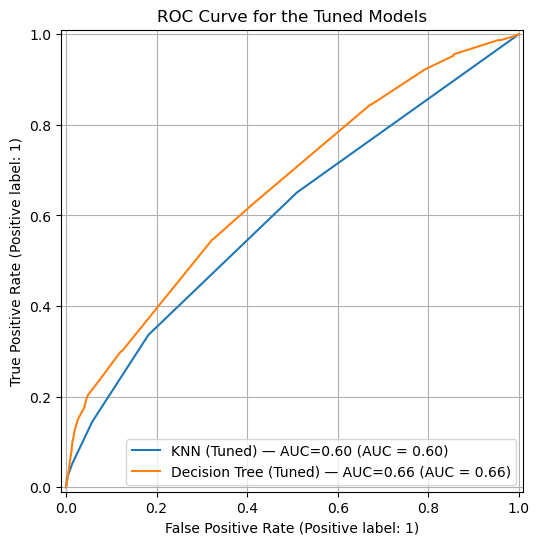

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

# Tuned KNN
y_proba_knn = knn_best.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(
    y_test,
    y_proba_knn,
    ax=ax, 
    name=f"KNN (Tuned) - AUC={roc_auc_score(y_test, y_proba_knn):.2f}"
)

# Tuned Decision Tree
y_proba_dt = dt_best.predict_proba(X_test)[:, 1]
RocCurveDisplay.from_predictions(
    y_test,
    y_proba_dt,
    ax=ax,
    name=f"Decision Tree (Tuned) - AUC={roc_auc_score(y_test, y_proba_dt):.2f}"
)

plt.title("ROC Curve for Tuned Models")
plt.grid(True)
plt.show()

Hyperparameter tuning marginaly improved AUC and precision but no significant improvement in recall or accuracy. The results again highlight that client attributes alone are not strong predictors of successful campaign outcome. Including campaign data such as contact duration, campaign history may help.

##### Questions